### Analytical versus numerical estimates of a partial molar enthalpy in a binary solution (M,P) = (2,1)

We are looking at the enthalpy model from SVN Example 10.4:

\begin{equation}
H = 400x_{1} + 600x_{2} + x_{1}x_{2}\left(40x_{1} + 20x_{2}\right)
\end{equation}

In [6]:
# include -
include("Include.jl");

In [8]:
# build the model -
H_model = Model(400.0,600.0,40.0,20.0);

### Plot real versus ideal enthalpy 

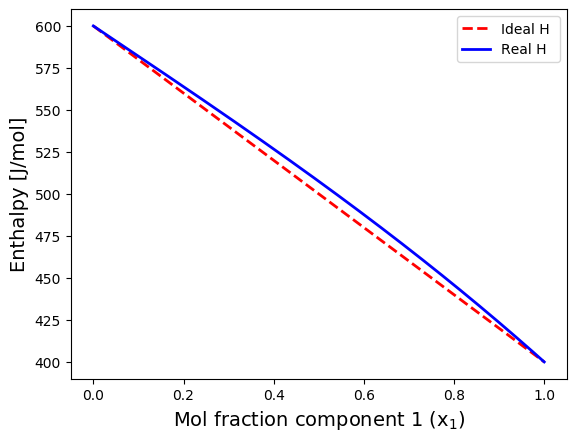

In [17]:
# compute the ideal_H -
x1_array = collect(range(0.0,stop=1.0,length=1000))
H_ideal_array = Array{Float64,1}()
for x1_value in x1_array
    
    # compute the ideal enthalpy (the first two terms) -
    H_ideal_value = evaluate_ideal_model(H_model,x1_value)
    push!(H_ideal_array,H_ideal_value)
end

# compute the real H -
H_real_array = Array{Float64,1}()
for x1_value in x1_array
    
    # compute the ideal enthalpy (the first two terms) -
    H_real_value = evaluate_real_model(H_model,x1_value)
    push!(H_real_array,H_real_value)
end

# plot -
plot(x1_array,H_ideal_array,"r--",lw=2,label="Ideal H ")
plot(x1_array,H_real_array,"b",lw=2,label="Real H")
xlabel(L"Mol fraction component 1 (x$_{1}$)",fontsize=14)
ylabel("Enthalpy [J/mol]",fontsize=14)
legend(loc="upper right");

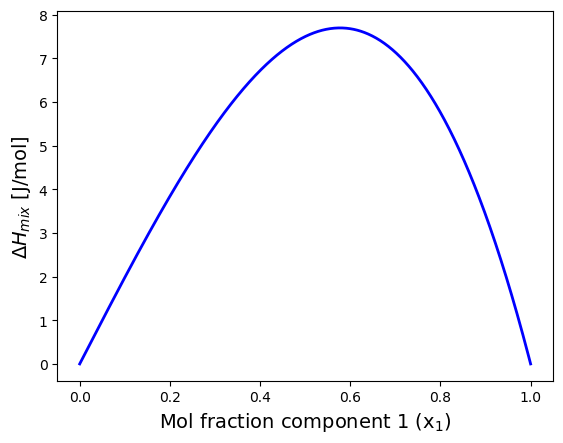

In [20]:
# Plot the dH mix -
dH_mix_array = H_real_array .- H_ideal_array
plot(x1_array,dH_mix_array,"b",lw=2)
xlabel(L"Mol fraction component 1 (x$_{1}$)",fontsize=14)
ylabel(L"$\Delta{H}_{mix}$ [J/mol]",fontsize=14);

### Compare numerical versus analytical estimates of $\bar{H}_{j}$

SVN analytically computes the derivarive which appears in the $\bar{H}_{1}$ and $\bar{H}_{2}$ expressions from the H model. Let's compare this analytical (exact) model for the partial molar properties with a numerical estimate of the derivative. For example, SVN showed:

\begin{equation}
\bar{H}_{1} = 420 - 60x_{1}^2+40x_{1}^3
\end{equation}

# compute the numerical H1_bar -
H1_bar_numerical_array = Array{Float64,1}()
for x1_value in x1_array
    
    # compute the ideal enthalpy (the first two terms) -
    H1_bar_value = estimate_H1_bar(H_model,x1_value)
    push!(H1_bar_numerical_array,H1_bar_value)
end

H1_bar_analytical_array = Array{Float64,1}()
for x1_value in x1_array
    
    # compute the ideal enthalpy (the first two terms) -
    H1_bar_value = 420 - 60*(x1_value)^2+40*(x1_value)^3
    push!(H1_bar_analytical_array,H1_bar_value)
end

plot(x1_array,H1_bar_numerical_array,"b",lw=2,label="Numerical")
plot(x1_array,H1_bar_analytical_array,"r--",lw=2,label="Analytical")
xlabel(L"Mol fraction component 1 (x$_{1}$)",fontsize=14)
ylabel(L"$\bar{H}_{1}$ [J/mol]",fontsize=14)
legend(loc="upper right");

### How would we do this if we had $M>2$?

In case with mixtures with greater than $M>2$ components, the sequations we developed for the partial model properties are not valid. In these cases, we would use the definition of partial molar properties to compute an expression for the partial model property. For example, to compute $\bar{H}_{i}$ we could:

\begin{equation}
\frac{\partial{nH}}{\partial{n}_{i}} = \frac{\partial}{\partial{n_{i}}}\Bigl[n\left(400\left(\frac{n_{1}}{n}\right) + 600\left(\frac{n_{2}}{n}\right) + \left(\frac{n_{1}}{n}\right)\left(\frac{n_{2}}{n}\right)\left(40\left(\frac{n_{1}}{n}\right) + 20\left(\frac{n_{2}}{n}\right)\right)\right)\Bigr]
\end{equation}

where $n$ = $n_{1}+n_{2}$